<a href="https://colab.research.google.com/github/helenanaa/Global-Earth-Temperatures/blob/main/Tugas_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


SRME: 34.456964617715


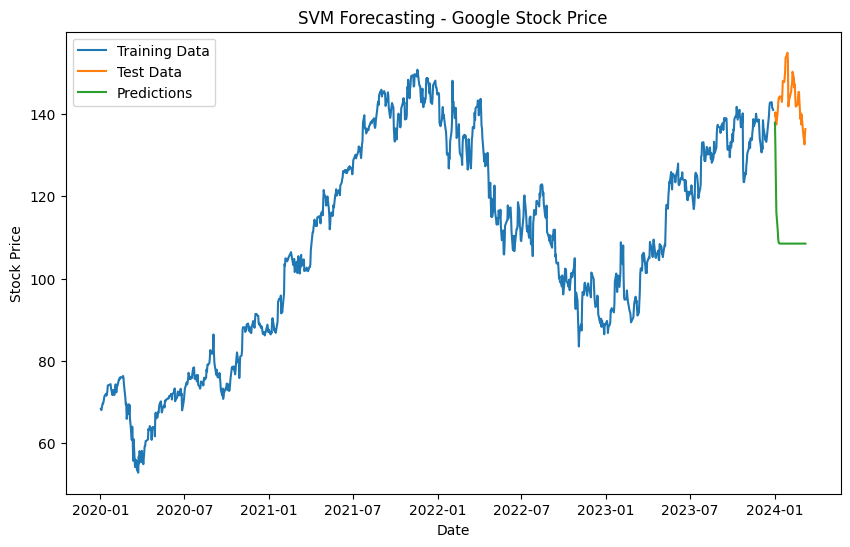

         Date  Original Price  Predicted Price
0  2024-01-02      139.559998       137.862506
1  2024-01-03      140.360001       131.305609
2  2024-01-04      138.039993       123.097854
3  2024-01-05      137.389999       116.092927
4  2024-01-08      140.529999       111.693652
5  2024-01-09      142.559998       109.579956
6  2024-01-10      143.800003       108.785436
7  2024-01-11      143.669998       108.548512
8  2024-01-12      144.240005       108.491952
9  2024-01-16      144.080002       108.481076
10 2024-01-17      142.889999       108.479384
11 2024-01-18      144.990005       108.479170
12 2024-01-19      147.970001       108.479148
13 2024-01-22      147.710007       108.479146
14 2024-01-23      148.679993       108.479146
15 2024-01-24      150.350006       108.479146
16 2024-01-25      153.639999       108.479146
17 2024-01-26      153.789993       108.479146
18 2024-01-29      154.839996       108.479146
19 2024-01-30      153.050003       108.479146
20 2024-01-31

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Mendapatkan data saham Google dari Yahoo Finance
stock_data = yf.download('GOOG', start='2020-01-01', end='2024-03-10')

# Memilih kolom Close sebagai data yang akan dijadikan time series
ts_data = stock_data['Close']

# Membagi data menjadi data training dan data testing
train_data = ts_data[:'2023-12-31']
test_data = ts_data['2024-01-01':]

# Mengubah indeks menjadi array numerik untuk SVR
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data.values

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data.values

# Membuat dan melatih model SVM
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)

# Melakukan prediksi pada data test
predictions = svr_rbf.predict(X_test)

# Menghitung SRME
mse = mean_squared_error(y_test, predictions)
srme = np.sqrt(mse)

print("SRME:", srme)

# Plot data train, data test, dan prediksi
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('SVM Forecasting - Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Tampilkan tabel prediksi harga dan harga asli data test
predictions_df = pd.DataFrame({'Date': test_data.index, 'Original Price': y_test, 'Predicted Price': predictions})
print(predictions_df)


[*********************100%%**********************]  1 of 1 completed


SRME: 9.189971629955968


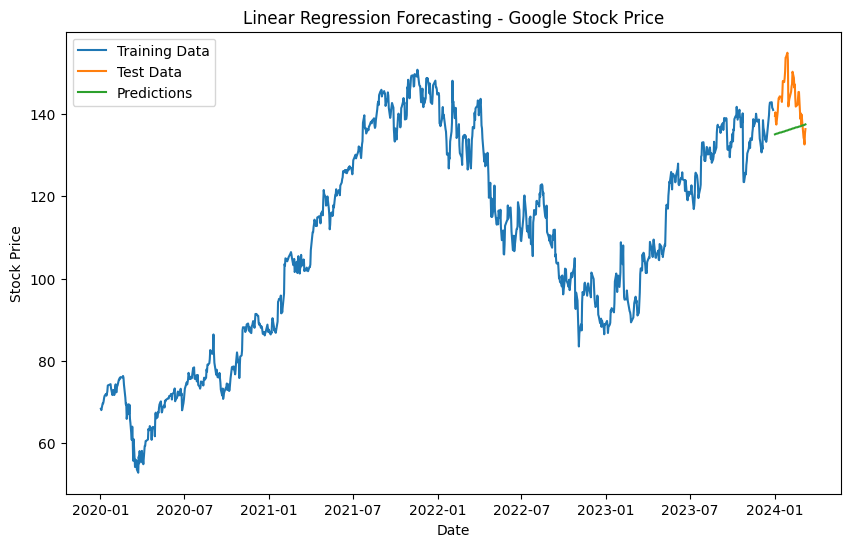

         Date  Original Price  Predicted Price
0  2024-01-02      139.559998       135.012667
1  2024-01-03      140.360001       135.065246
2  2024-01-04      138.039993       135.117826
3  2024-01-05      137.389999       135.170406
4  2024-01-08      140.529999       135.222985
5  2024-01-09      142.559998       135.275565
6  2024-01-10      143.800003       135.328144
7  2024-01-11      143.669998       135.380724
8  2024-01-12      144.240005       135.433303
9  2024-01-16      144.080002       135.485883
10 2024-01-17      142.889999       135.538463
11 2024-01-18      144.990005       135.591042
12 2024-01-19      147.970001       135.643622
13 2024-01-22      147.710007       135.696201
14 2024-01-23      148.679993       135.748781
15 2024-01-24      150.350006       135.801361
16 2024-01-25      153.639999       135.853940
17 2024-01-26      153.789993       135.906520
18 2024-01-29      154.839996       135.959099
19 2024-01-30      153.050003       136.011679
20 2024-01-31

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Mendapatkan data saham Google dari Yahoo Finance
stock_data = yf.download('GOOG', start='2020-01-01', end='2024-03-10')

# Memilih kolom Close sebagai data yang akan dijadikan time series
ts_data = stock_data['Close']

# Membagi data menjadi data training dan data testing
train_data = ts_data[:'2023-12-31']
test_data = ts_data['2024-01-01':]

# Mengubah indeks menjadi array numerik untuk Linear Regression
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data.values

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data.values

# Membuat dan melatih model Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Melakukan prediksi pada data test
predictions = model_LR.predict(X_test)

# Menghitung SRME
mse = mean_squared_error(y_test, predictions)
srme = np.sqrt(mse)

print("SRME:", srme)

# Plot data train, data test, dan prediksi
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Linear Regression Forecasting - Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Tampilkan tabel prediksi harga dan harga asli data test
predictions_df = pd.DataFrame({'Date': test_data.index, 'Original Price': y_test, 'Predicted Price': predictions.flatten()})
print(predictions_df)